In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

In [25]:
ship = pd.read_csv('Ship_Maintenance_data.csv')
ship.head()

C:\Users\Owner\anconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accounting Code,Action Text,Call Type,Year,Quarter,Month,Day,Customer City,Customer Country,Customer Geocenter,...,Total Hours,Travel Cost $,Travel Hours,Year.4,Quarter.4,Month.4,Day.4,Warranty Length (Years),Was Call a Phone Fix ?,Was Instr. Out of Warranty ?
0,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
1,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
2,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
3,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
4,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes


In [26]:
 
  
#To scale data 
#scaler.fit(ship)
ship.head()

,Accounting Code,Action Text,Call Type,Year,Quarter,Month,Day,Customer City,Customer Country,Customer Geocenter,...,Total Hours,Travel Cost $,Travel Hours,Year.4,Quarter.4,Month.4,Day.4,Warranty Length (Years),Was Call a Phone Fix ?,Was Instr. Out of Warranty ?
0,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
1,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
2,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
3,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes
4,MC - Contract,NaN,PM - Preventive Maintenance,2018,Qtr 4,November,30,ALPENA,USA,Americas,...,29.0,3000.0,20.0,2007.0,Qtr 3,August,10.0,1.01,No,Yes


In [27]:
# X = ship.drop(['Item Commercial Cost $', 'Item Factory Cost $', 'Labor Cost $', 'Material Commercial Cost $', 'Material Factory Cost $', 'Total Commercial Call Cost $', 'Total Factory Call Cost $'], axis = 1)
# y = ship[['Item Commercial Cost $', 'Item Factory Cost $', 'Labor Cost $', 'Material Commercial Cost $', 'Material Factory Cost $', 'Total Commercial Call Cost $', 'Total Factory Call Cost $']]
# defining my dependent varibles 'Total Commercial Call Cost $'and my independent varibles everython else
y = ship['Total Commercial Call Cost $']
X = ship.drop(['Total Commercial Call Cost $'], axis = 1)

In [28]:
# dropping non quantative data since currently the regression model will not know what to do with non quantative data
X = X.drop(['Accounting Code', 'Call Type', 'Quarter', 'Customer City', 'Customer Country'], axis = 1)
X = X.drop(['Customer Geocenter', 'Customer Name', 'Customer State', 'Equipment                     Product Line'], axis = 1)
X= X.drop(['Equipment Product Family', 'Equipment Product ID', 'Equipment Responsible Factory', 'Equipment Serial Number'], axis = 1)
X = X.drop(['Equipment Technique', 'Error Code', 'Error Code Group', 'Error Code Name'], axis = 1)
X = X.drop(['Error Description', 'Excellence Rating                                        (Installs Only)'], axis = 1)
X = X.drop(['Month', 'Notification Detail Text', 'Problem Text'], axis = 1)
X = X.drop(['Part Number                                        or                                                  Activity Type'], axis=1)
X = X.drop(['Service Order Status Desc', 'Service Region Name', 'Was Call a Phone Fix ?'], axis = 1)
X = X.drop(['Was Instr. Out of Warranty ?'], axis = 1)
X = X.drop(['Month.1', 'Month.2', 'Month.3', 'Month.4'], axis = 1)
X = X.drop(['Quarter.1', 'Quarter.2', 'Quarter.3', 'Quarter.4'], axis = 1)
X = X.drop(['Action Text', 'Service Order ID'], axis = 1)
X = X.drop(['Equipment Original Sales Order'], axis = 1)

In [29]:
X.head()
# scaler.fit(X)
# scaler.fit(y)
# there are a few null places and the regression model will not know what to so filling in null spotts 
X = X.fillna(0)
y = y.fillna(0).values.reshape(-1, 1)

In [30]:
# plt.scatter(X, y)
# plt.show()
# splitting my data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# I am going to have to models one with scaled data another with non scaled data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\Owner\anconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [32]:
# scaling everything
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Owner\anconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Owner\anconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# intially I was going to try a logistic regression but that did not work
from sklearn.linear_model import LogisticRegression, LinearRegression
classifier = LogisticRegression()


In [34]:
# model is going to get trained with the scaled data model2 is going to be with non scaled data
model = LinearRegression()
model2 = LinearRegression()

In [35]:
# fitting data
model.fit(X_train_scaled, y_train_scaled)
model2.fit(X_train, y_train)
#classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# classifier.fit(X_train, y_train)

In [37]:
# determing the r2 of each model
r2 = model.score(X_test_scaled, y_test_scaled)
r21 = model.score(X_test, y_test)
print(f"r2 of scaled data: {r2}")
print(f"r2 of non scaled data:{r21}")

r2 of scaled data: 1.0
r2 of non scaled data:0.5759444076085958


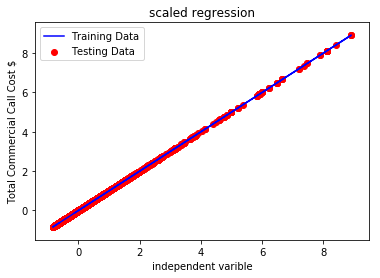

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(model.predict(X_train_scaled), y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.title('scaled regression')
plt.xlabel('independent varible')
plt.ylabel('Total Commercial Call Cost $')
plt.show()
plt.savefig('C:/Users/Owner/Desktop/thermo fisher/Neurodiversity_in_the_Workplace_Data_Analysis/raw_data/scaled_fit_comercal_cost.png')

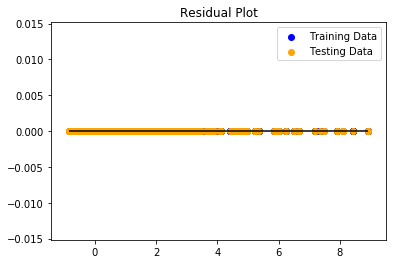

In [40]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

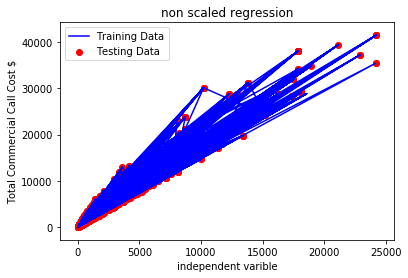

<Figure size 432x288 with 0 Axes>

In [44]:
plt.plot(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test, c="red", label="Testing Data")
plt.legend()
plt.title('non scaled regression')
plt.xlabel('independent varible')
plt.ylabel('Total Commercial Call Cost $')
plt.show()
plt.savefig('C:/Users/Owner/Desktop/thermo fisher/Neurodiversity_in_the_Workplace_Data_Analysis/raw_data/fit_comercal_cost.png')
plt.show()

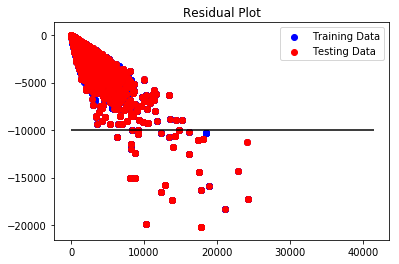

In [45]:
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=-10000, xmin=y_test_scaled.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()